HESS
[[ 1.0549334e+01  4.8280301e+00  2.5469334e+01  1.5010910e-01
   4.5781196e-03  2.5833884e-01 -2.0000000e+00]
 [ 1.1216000e+01  4.7451057e+00  2.6958666e+01  1.3718438e-01
   1.3696947e-02  1.2655200e-01 -1.0000000e+00]
 [ 1.2004000e+01  4.6544480e+00  2.8530666e+01  1.4124526e-01
   5.0680558e-03  2.1193989e-02 -2.0000000e+00]
 [ 1.1602667e+01  4.7136159e+00  2.8044001e+01  2.1221653e-01
   1.6984344e-02  3.4719959e-01  0.0000000e+00]]
HESS + L2SP
[[1.04466667e+01 4.83540344e+00 2.53013325e+01 6.85424954e-02
  4.73256260e-02 7.85724446e-02 2.00000000e+00 5.00000000e+00]
 [1.09866667e+01 4.76440382e+00 2.67093334e+01 9.54490378e-02
  2.69814245e-02 2.11503267e-01 3.00000000e+00 5.00000000e+00]
 [1.16986666e+01 4.69874525e+00 2.83293343e+01 1.04415126e-01
  3.32358293e-02 1.28087938e-01 3.00000000e+00 2.00000000e+00]
 [1.11053333e+01 4.73974466e+00 2.68840008e+01 6.69416562e-02
  1.97663829e-02 2.01231763e-01 4.00000000e+00 5.00000000e+00]]
HESS + Noise
[[1.0585333e+01 4.8274879e+0

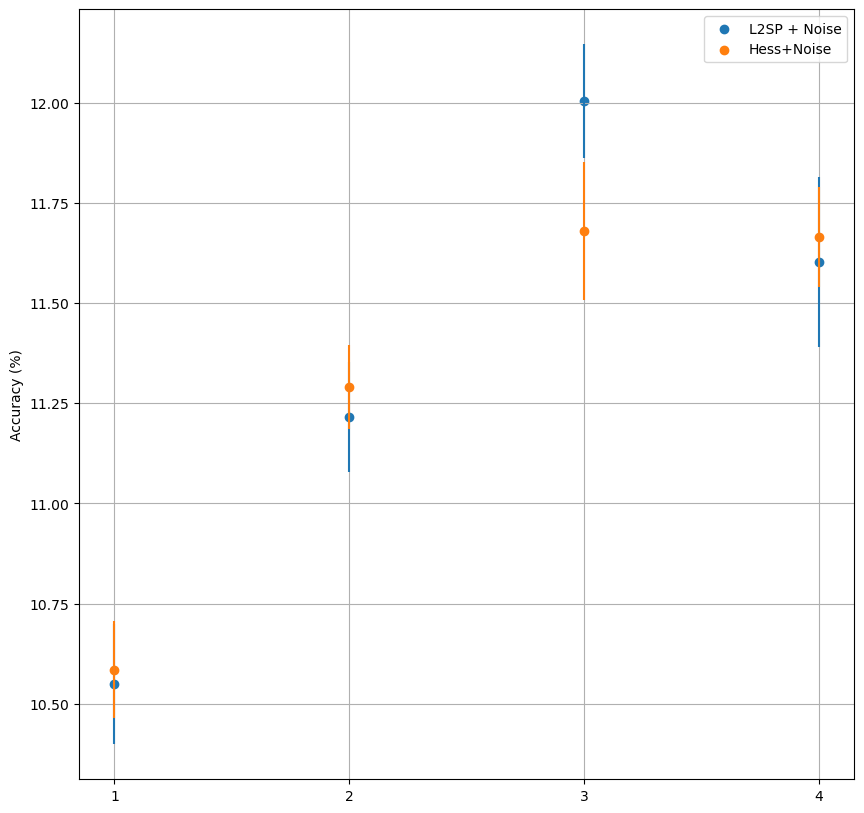

In [3]:
import numpy as np
import matplotlib.pyplot as plt

resultHess = []

def plot(x,y,yErr,label):
    plt.scatter(x, y, label = label)
    plt.errorbar(x, y, yerr = yErr,  ls='none') 
verbose = False
resultHess = []

for conv in [1,2,3,4]:
    path = f"/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/ResultIdNoise/Conv{conv}/result.npy"
    result = np.load(path)
    
    indice = np.argmax(result[:,0])
    if verbose: print(f"regularization conv{conv}=",result[indice,-2:])
    # print(f"result conv{conv} = {result[indice]}")
    resultHess.append(result[indice])

resultHess = np.array(resultHess)
print("HESS")
print(resultHess)
resultHessL2SP = []

for conv in [1,2,3,4]:
    path = f"/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/ResultHessian/Conv{conv}/resultL2SP.npy"
    result = np.load(path)
    
    indice = np.argmax(result[:,0])
    if verbose: print(f"regularization conv{conv}=",result[indice,-2:])
    # print(f"result conv{conv} = {result[indice]}")
    resultHessL2SP.append(result[indice])

resultHessL2SP = np.array(resultHessL2SP)
print("HESS + L2SP")

print(resultHessL2SP)

resultHessNoise = []
for conv in [1,2,3,4]:
    path = f"/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/ResultHessianNoise/Conv{conv}/result.npy"
    result = np.load(path)
    
    indice = np.argmax(result[:,0])
    if verbose: print(f"regularization conv{conv}=",result[indice,-2:])
    # print(f"result conv{conv} = {result[indice]}")
    resultHessNoise.append(result[indice])
resultHessNoise = np.array(resultHessNoise)
print("HESS + Noise")

print(resultHessNoise)

resultId = np.load("/idiap/temp/vpocard/ImageNetTF/More_classes/Experiment/ResultId/result.npy")
# print(resultId)
plt.figure(figsize=(10,10))
print("L2SP")

print(resultId)

for i in range(1):
    # plt.subplot(3,1,i+1)
    # plt.errorbar(range(1,5),  resultId[:,i]  ,resultId[:,i+3],label="L2SP",marker=".")
    plt.ylabel("Accuracy (%)")
    # plot(range(1,5),  resultId[:,i]  ,resultId[:,i+3],label="L2SP")
    # plt.errorbar(range(1,5),  resultHess[:,i], resultHess[:,i+3],marker='o',linewidth=0,label="Hess")
    plot(range(1,5),  resultHess[:,i], resultHess[:,i+3],label="L2SP + Noise")
    # plot(range(1,5),  resultHessL2SP[:,i], resultHessL2SP[:,i+3],label="Hess+L2SP")
    plot(range(1,5),  resultHessNoise[:,i], resultHessNoise[:,i+3],label="Hess+Noise")
    plt.legend()
    plt.xticks(range(1,5),range(1,5))
    plt.grid(True)